<a>Part A</a>

Setup environment 

In [1]:
import numpy as np
import os 
import pandas as pd
import re
import matplotlib.pyplot as plt

Let's first set up variables for the function.
<br>
Then use for-loop to create a list than contains all results.
<br>
Because the required output uses fixed input, there is no need to create a class or function.
<br>
Using fixed parameters and inputs is the most efficient way to solve the question.

In [2]:
#Parameters a b c:
a = 35.74
b = 0.6215
c = 0.4275

#Exponential factor e:
e = 0.16

#Create a temporary list ans to gather output
ans = []

#Use numpy to create the list of all temperatures and windspeed
temp = np.arange(-20,51,10)
windspeed = np.arange(0,51,5)

#Write each result from the function into the list
for i in windspeed:
    for v in temp:
        num = a + (b * v) - (a*(i ** e)) + (c * v * (i ** e))
        ans.append(float("{0:.2f}".format(num)))   

The required output format can be archived most easily using pandas dataframe.
<br>
It is easier to create a pandas data frame using numpy array.
<br>
Use numpy to convert and reshape the list to an array that contains each row as a list and ready for dataframe.
<br>
Then create a dataframe.

In [3]:
nplist = np.asarray(ans)
nplist = np.reshape(nplist,(len(windspeed), len(temp)))
df = pd.DataFrame(nplist, index = windspeed, columns = temp)
df

,-20,-10,0,10,20,30,40,50
0,23.31,29.53,35.74,41.96,48.17,54.39,60.60,66.81
5,-33.99,-22.24,-10.50,1.25,12.99,24.74,36.49,48.23
10,-40.71,-28.31,-15.92,-3.53,8.87,21.26,33.66,46.05
15,-45.00,-32.19,-19.38,-6.57,6.23,19.04,31.85,44.66
20,-48.22,-35.10,-21.98,-8.86,4.26,17.38,30.50,43.62
25,-50.82,-37.45,-24.08,-10.71,2.66,16.03,29.40,42.77
30,-53.01,-39.43,-25.85,-12.27,1.32,14.90,28.48,42.06
35,-54.92,-41.15,-27.39,-13.62,0.15,13.91,27.68,41.44
40,-56.61,-42.68,-28.75,-14.82,-0.89,13.04,26.97,40.89
45,-58.13,-44.05,-29.98,-15.90,-1.82,12.25,26.33,40.40


<a>Part B i<a/>

Again, check my working directory so that I know where to place the data files and avoid coding exact directory of files

In [4]:
pwd

'C:\\Users\\lllll'

Read data files seperately

In [5]:
airline = pd.read_csv('airlines.csv')
airport = pd.read_csv('airports.csv')
flight = pd.read_csv('flights.csv')
plane = pd.read_csv("planes.csv")
weather = pd.read_csv("weather.csv")

Print the number of rows in each file

In [6]:
print("number of rows in airlines file: ",len(airline))
print("number of rows in airport file: ", len(airport))
print("number of rows in flights file: ", len(flight))
print("number of rows in planes file: ", len(plane))
print("number of rows in weather file: ", len(weather))

number of rows in airlines file:  16
number of rows in airport file:  1458
number of rows in flights file:  336776
number of rows in planes file:  3322
number of rows in weather file:  26130


<a>Part B ii</a>

To determine delay, let's first look into datas

In [7]:
airport.head()

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,2,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,3,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,4,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,5,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


No useful info in airport data, check flight data

In [8]:
flight.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [9]:
flight.describe()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168388.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,1.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84194.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168388.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252582.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336776.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


dep_delay and carrier are what we need to plot histogram

Histogram using pandas

We need to group the data by carrier first, then plot histogram for each carrier's dep_delay. I gonna normalize the data instead of using frequency so it's easier to understand which airline is good at on-time departure.
<br>
I am not sure if negative dep_delay time is counted as on-time departure as well because the question did not specify whether early departure is counted as on-time or not.
<br>
I will look into both conditions.

Situation when negative dep_delay is not treated as on-time departure.
<br>
I use normal distribution histogram for this situation.

carrier
9E    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
AA    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
AS    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
B6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
DL    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
EV    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
F9    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
FL    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
HA    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
MQ    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
OO    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
UA    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
US    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
VX    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
WN    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
YV    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

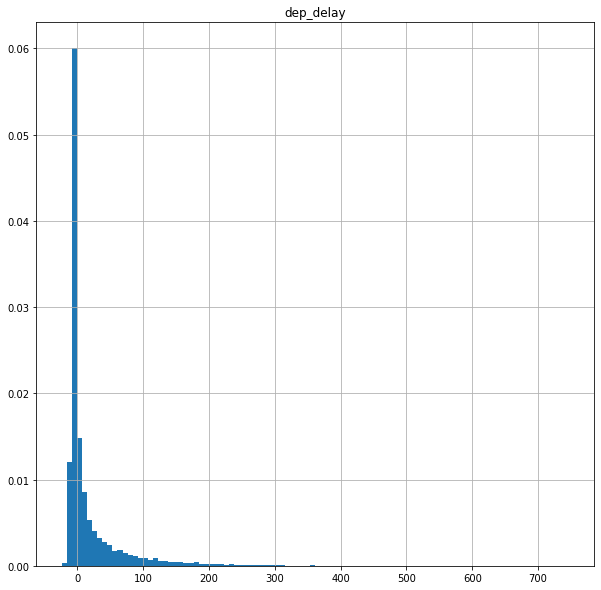

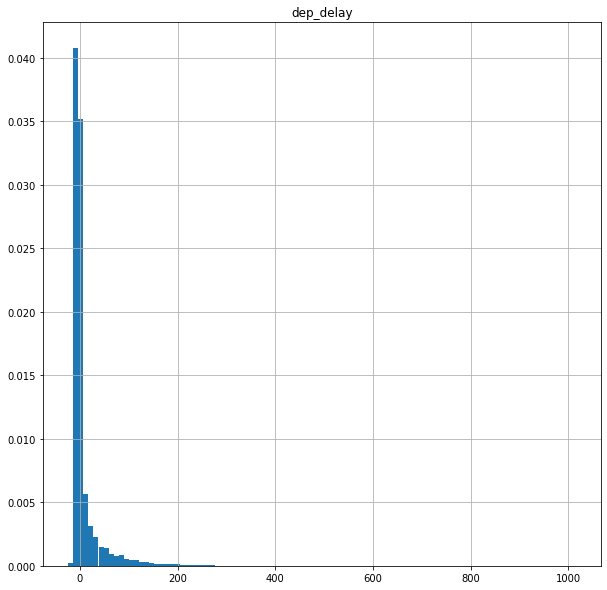

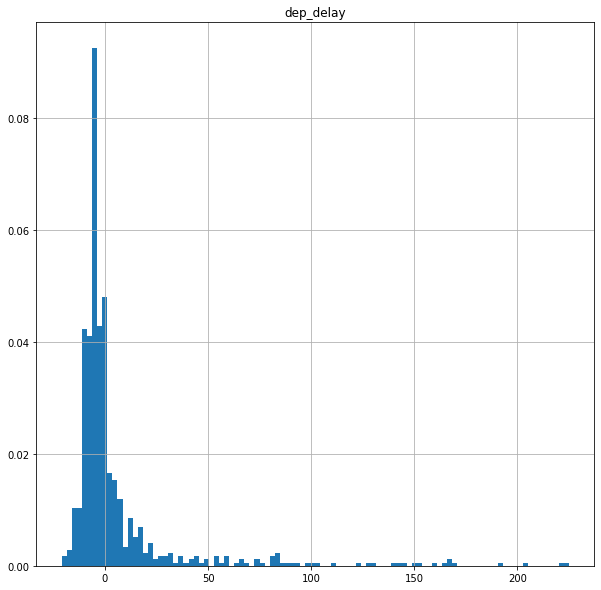

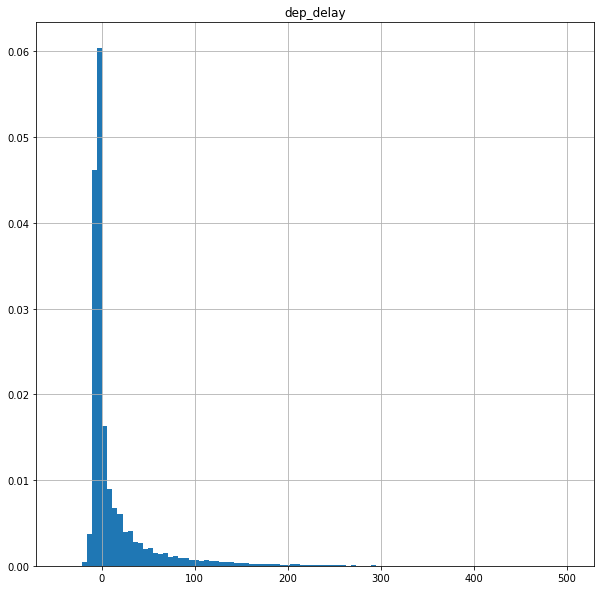

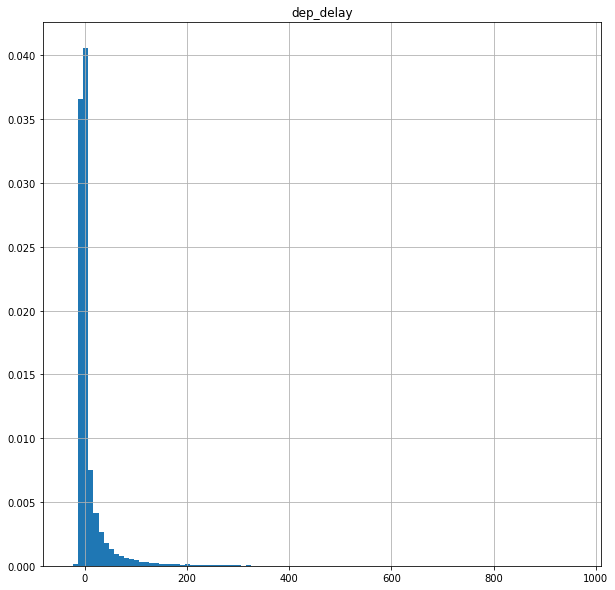

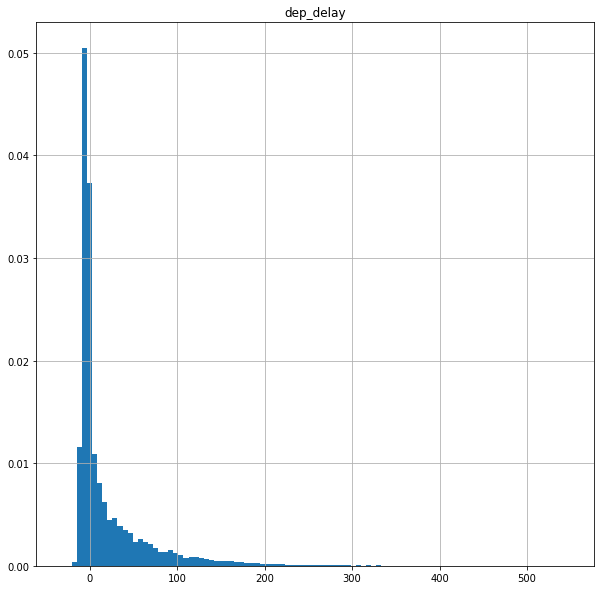

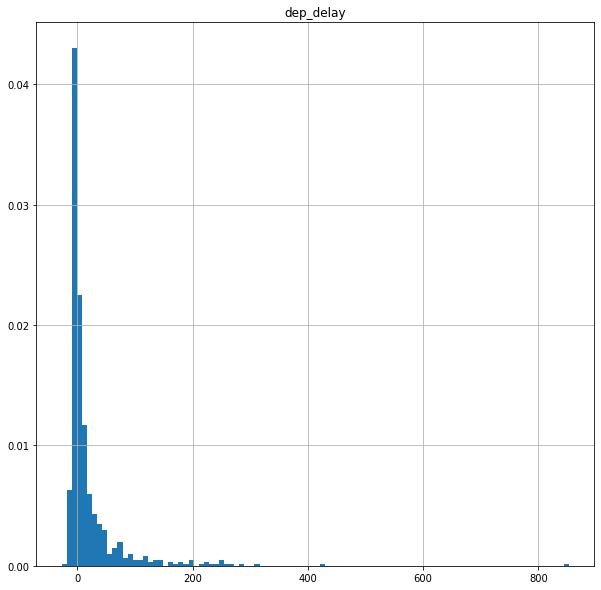

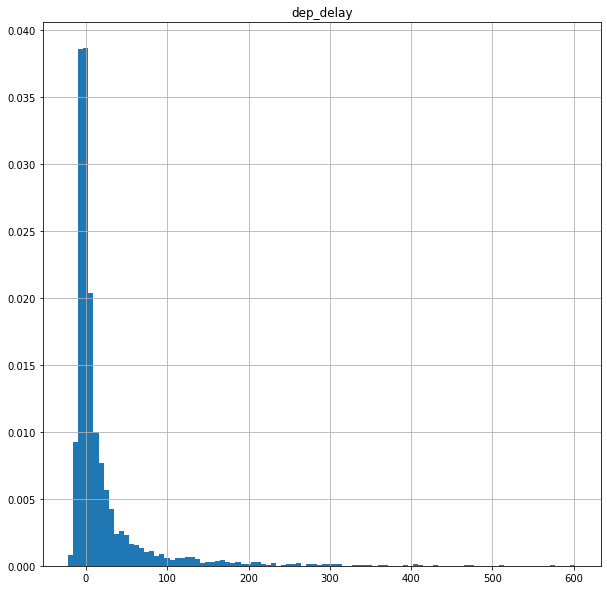

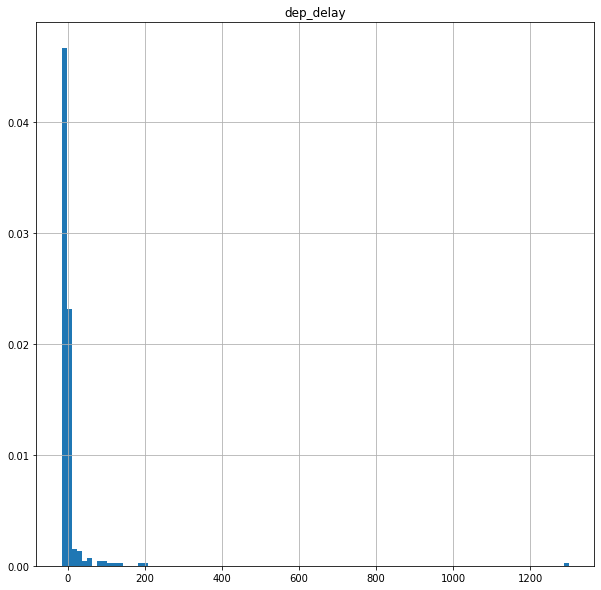

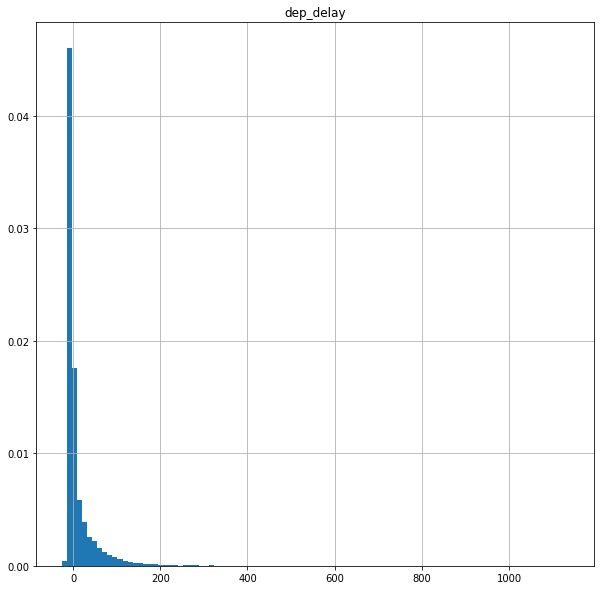

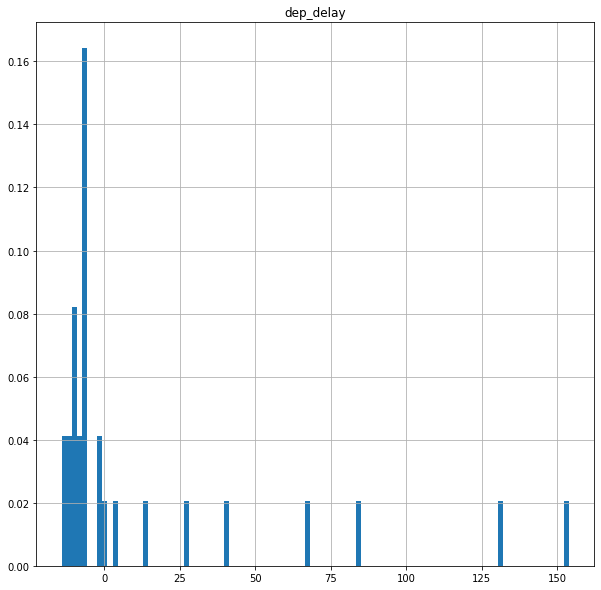

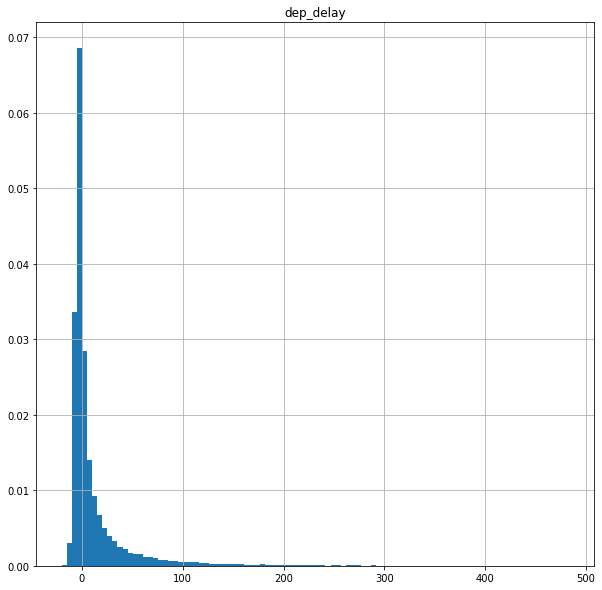

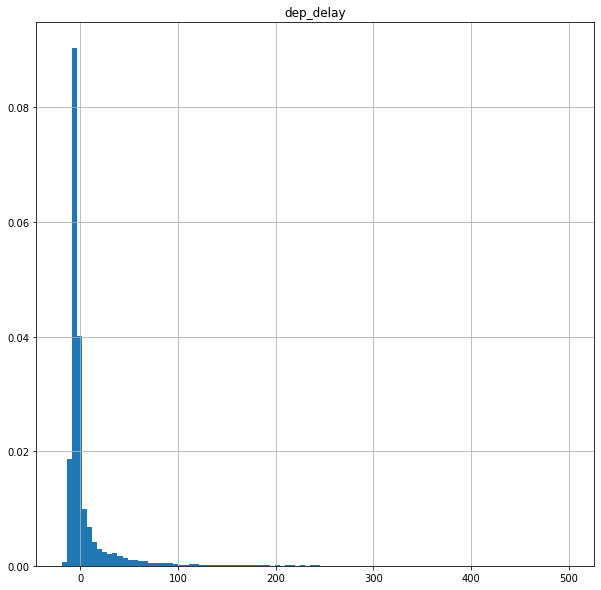

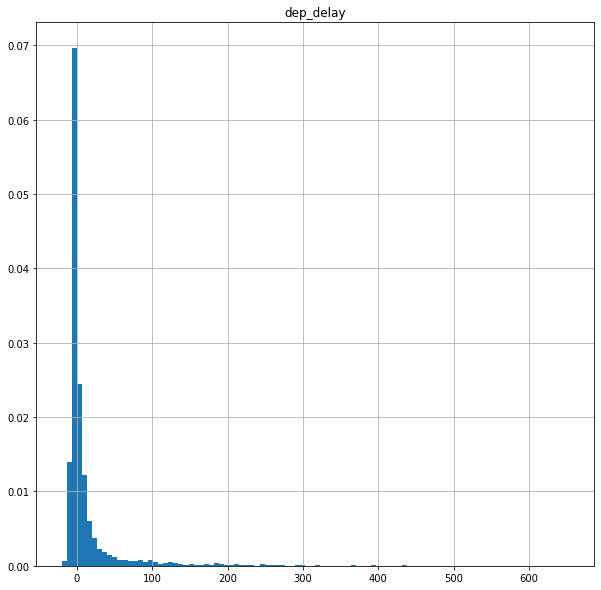

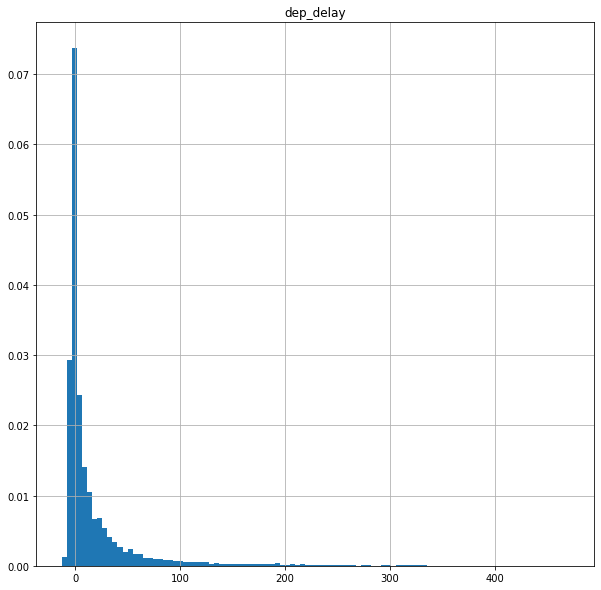

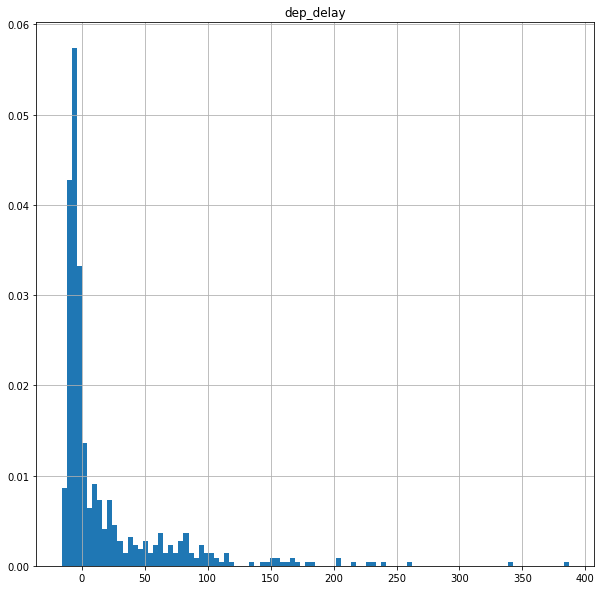

In [10]:
flight.groupby('carrier').hist('dep_delay', figsize = (10,10), 
                               density = True, sharex = False, sharey = False, bins = 100)

Looks like WN is the best when we don't consider negative dep_delay as on-time departure.
<br>


Now let's look into situation where negative dep_delay (early departure) count as on-time departure as well. 
<br>
To do so, use CDF instead of PDF.


carrier
9E    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
AA    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
AS    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
B6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
DL    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
EV    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
F9    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
FL    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
HA    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
MQ    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
OO    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
UA    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
US    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
VX    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
WN    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
YV    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

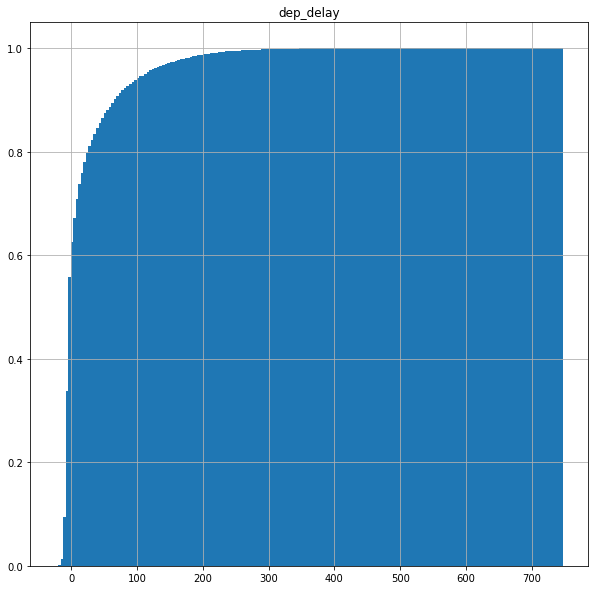

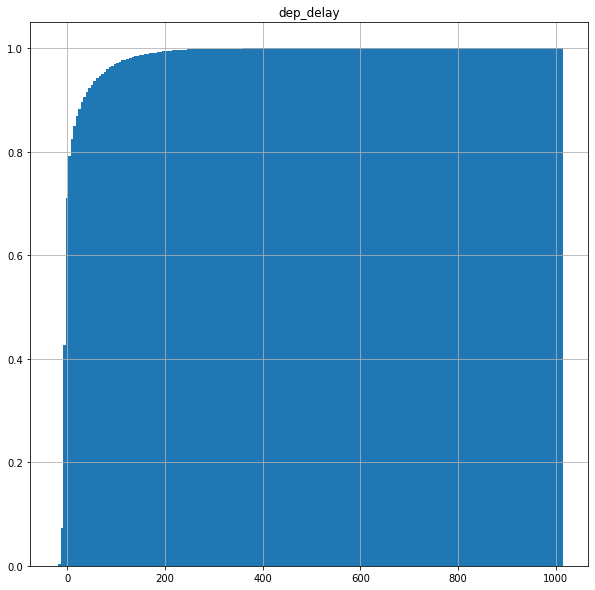

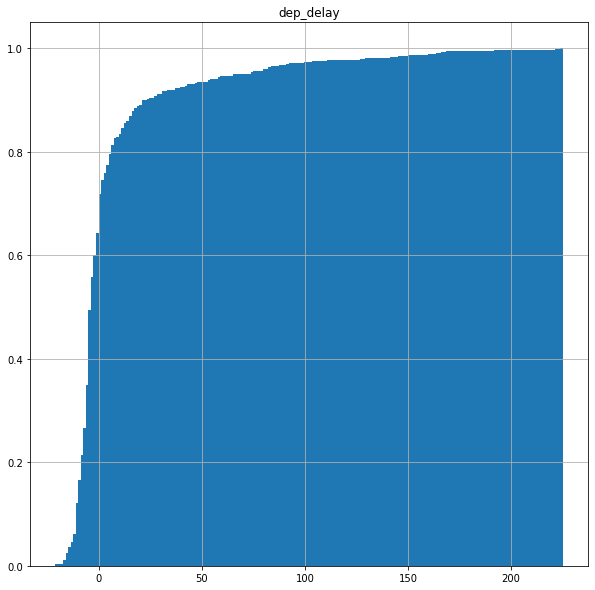

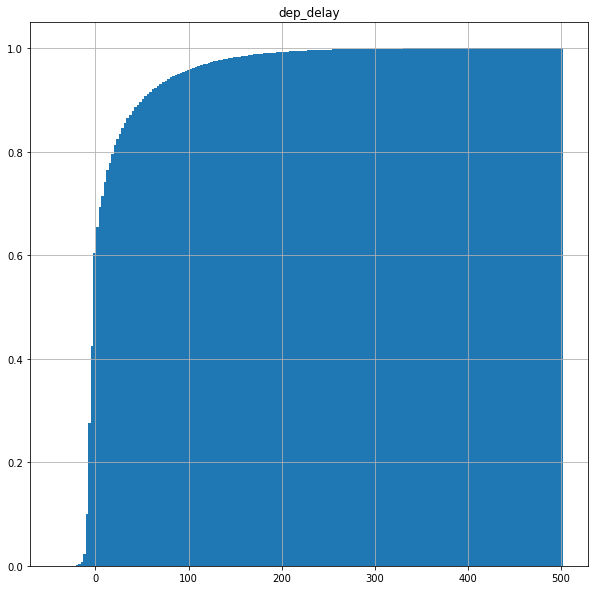

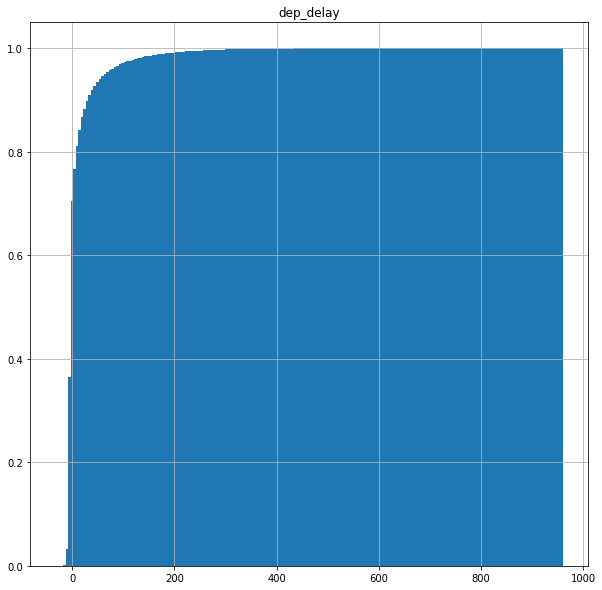

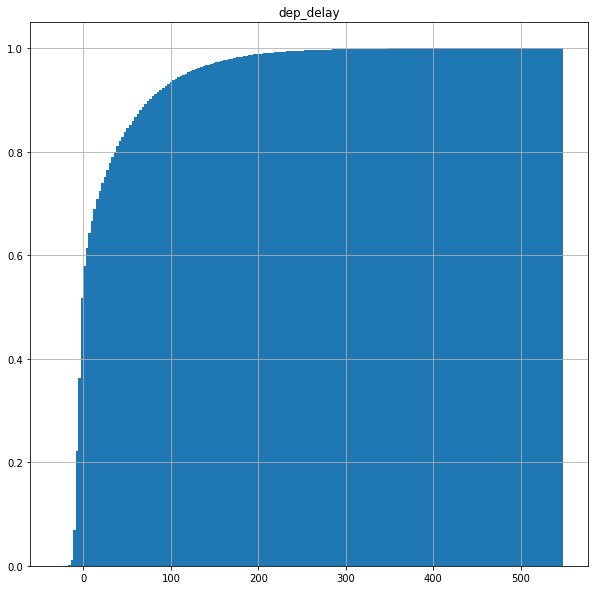

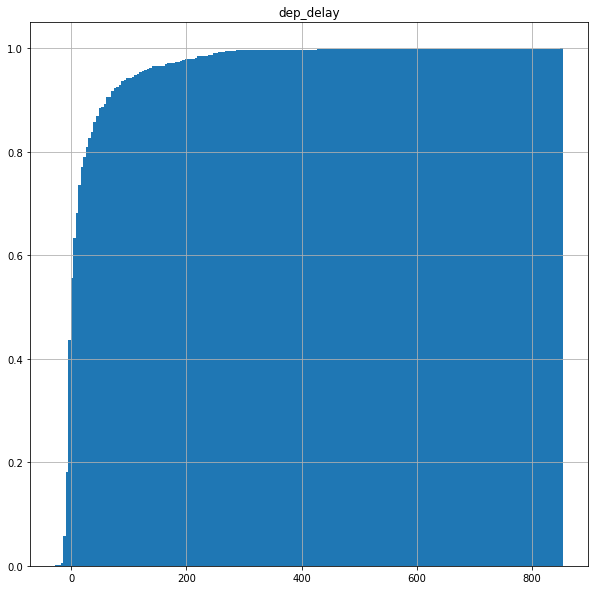

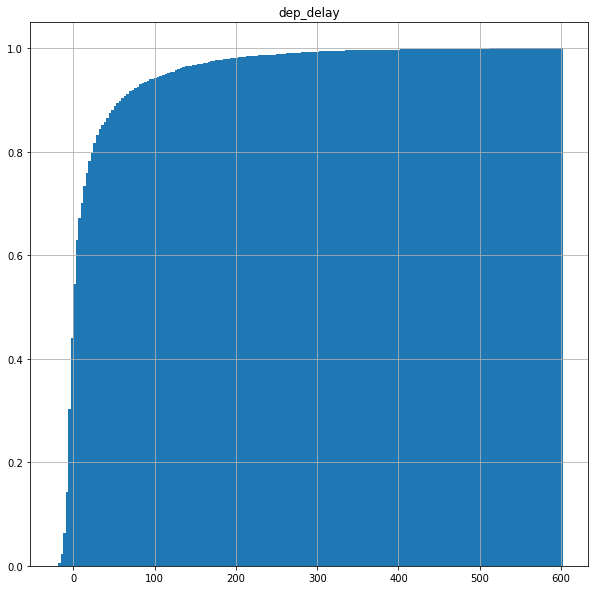

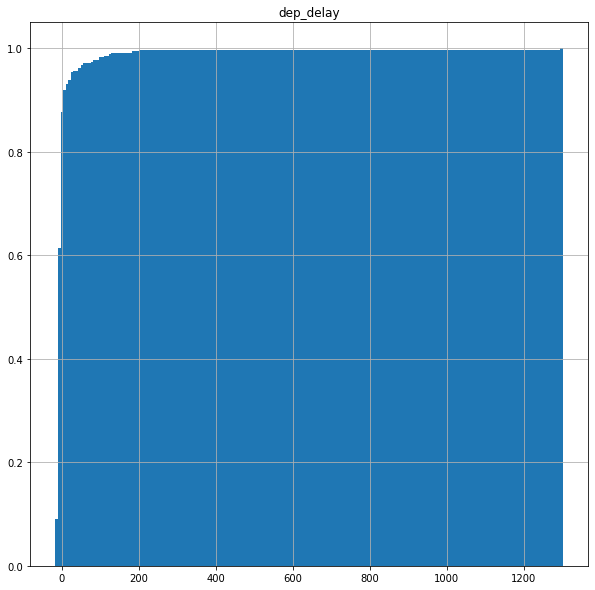

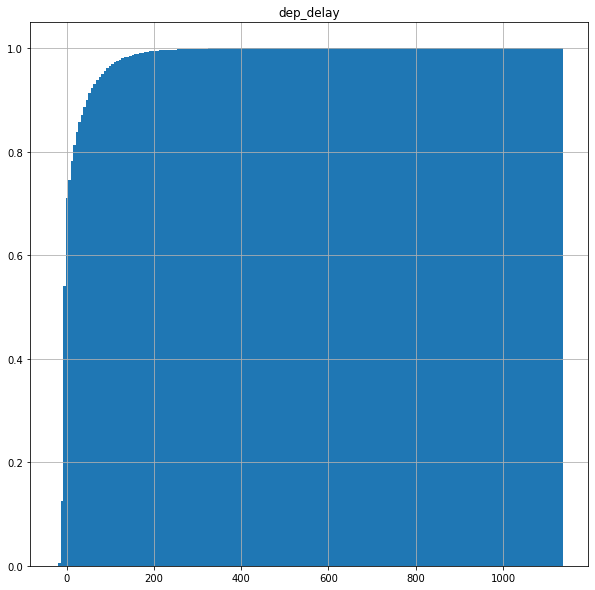

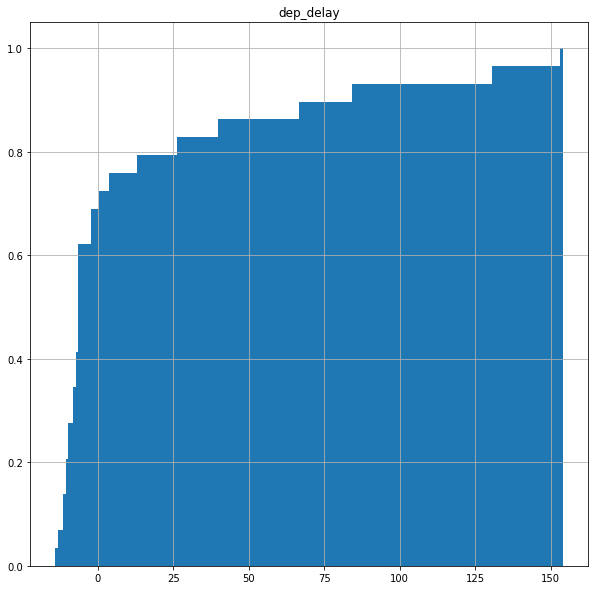

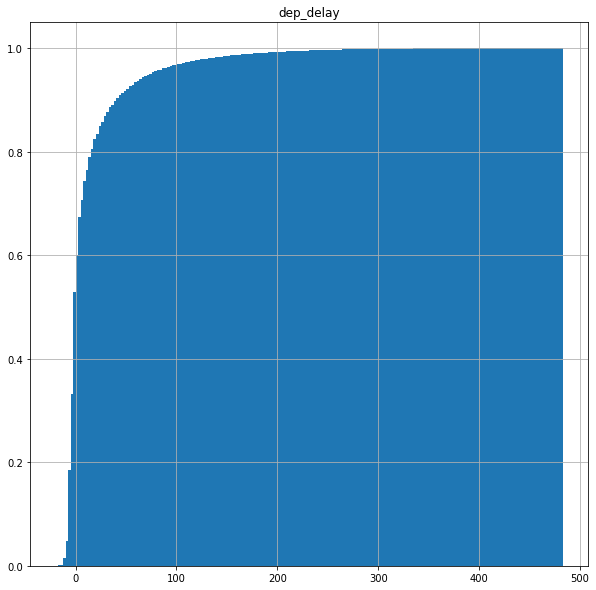

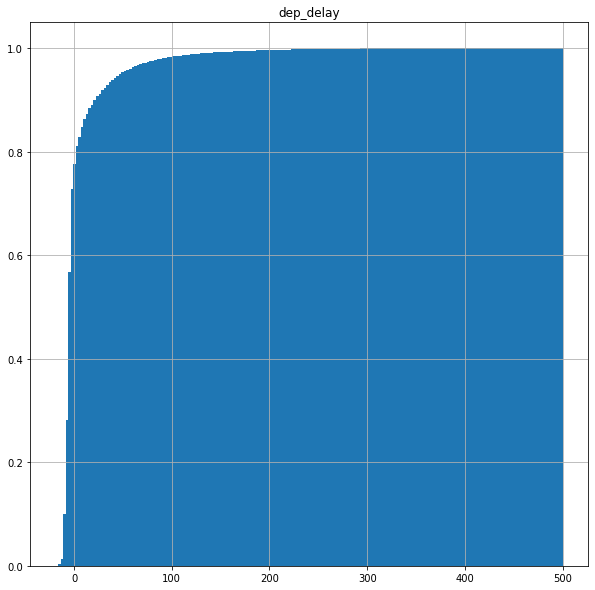

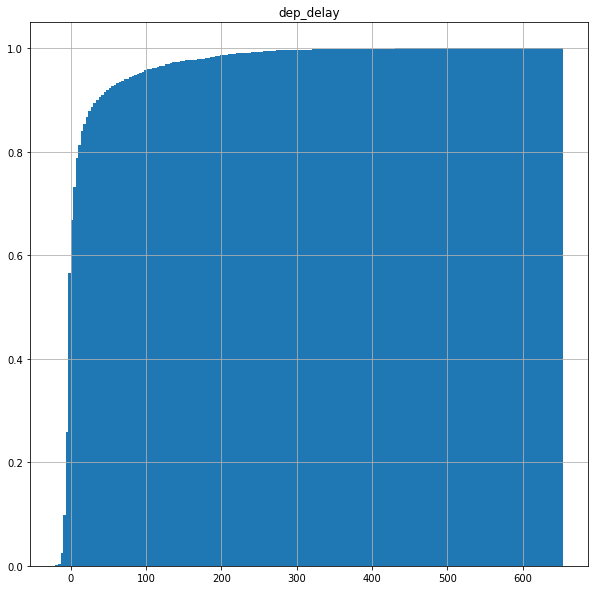

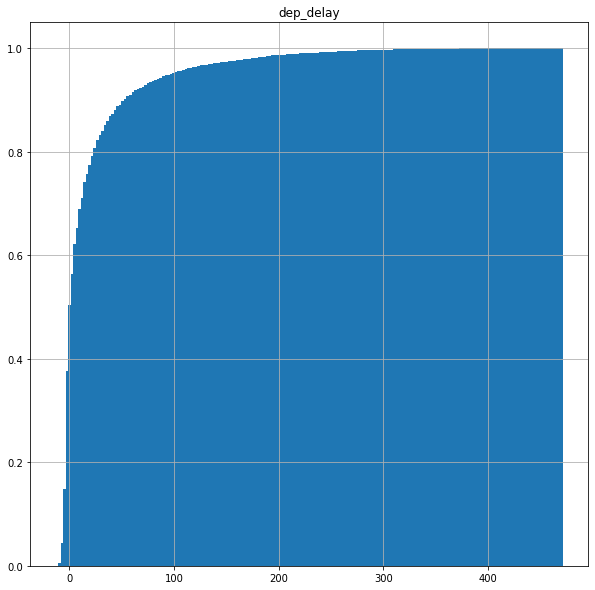

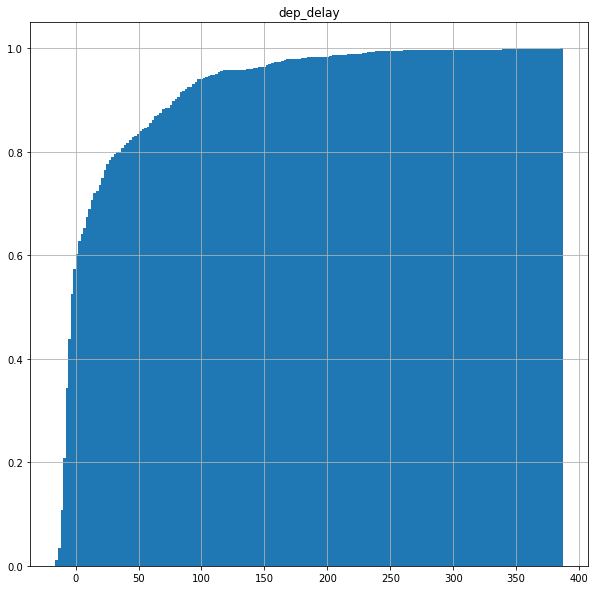

In [11]:
flight.groupby('carrier').hist('dep_delay', figsize = (10,10), 
                               density = True, sharex = False, sharey = False, bins = 200, cumulative = True)

If we consider negative dep_delay as well, HA is the best in terms of on-time departure

Histograms using matplotlib

In [12]:
from matplotlib import pyplot as plt

From previouse histogram we can know that there are 16 different carrier

I will use a for loop to iternate on the carrier name list to subplot every carrier's histogram 
<br>
Situation where negative dep_delay is not on-time departure.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


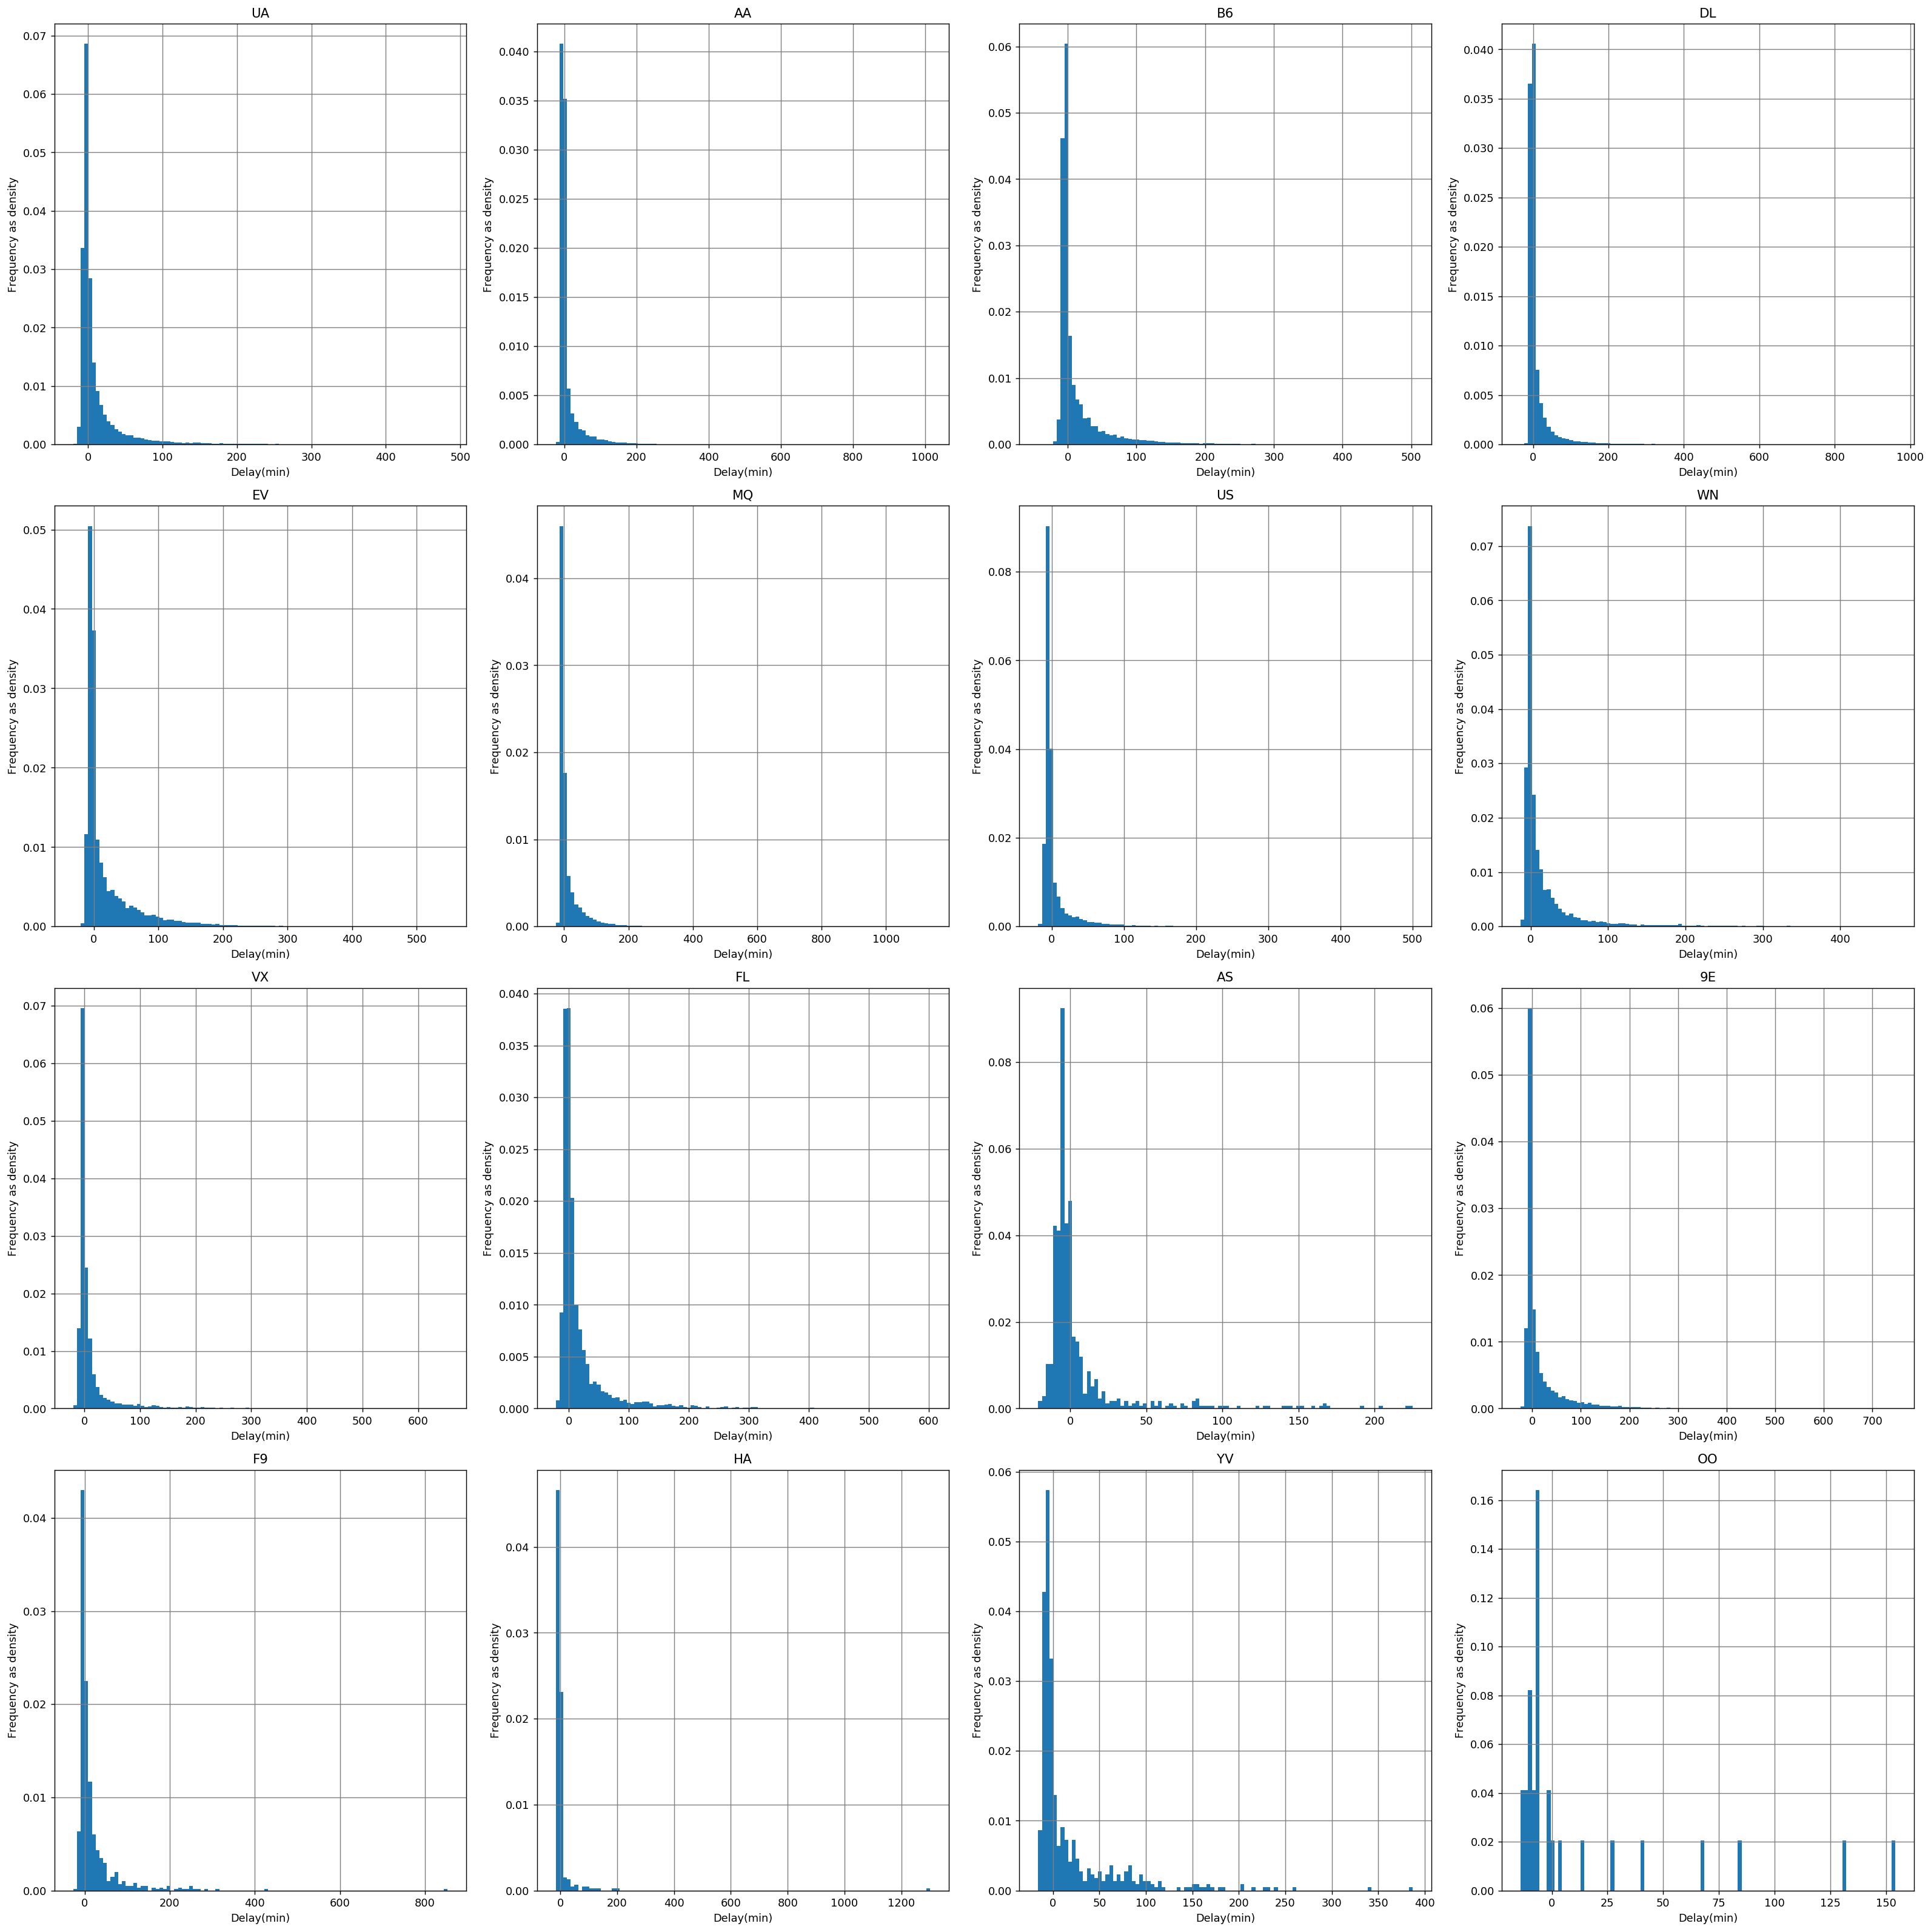

In [13]:
'''
Matplotlib seems require us to subplot each group of data manually, 
so let's create a list that contains each carrier's code for the for loop
'''
carrierlist = flight.carrier.unique()
carrierlist

'''
The last argument in the subplot() tells pyplot which plot is processing right now, 

Starts from 1 and ends at length of carrier,

We can use enumerate() function to get the index of each carrier in our list.

enumerate(list) will make the list similar to a dictionary, the key is the index and the value is the element in the list

Because Python starts with 0, we should use n+1 for the subplot() argument
'''
plt.figure(dpi = 128, figsize = (25,25))
for n, i in enumerate(carrierlist):
    plt.subplot(4,4,n+1)
    plt.hist(flight.dep_delay[flight.carrier == i], bins = 100, density = True)
    plt.title(i)
    plt.xlabel("Delay(min)")
    plt.ylabel("Frequency as density")
    plt.grid(True, color = 'gray', linestyle = '-')

plt.tight_layout()
plt.show()       

WN is the best on on-time departure again.

Situation where negative dep_delay is on-time.

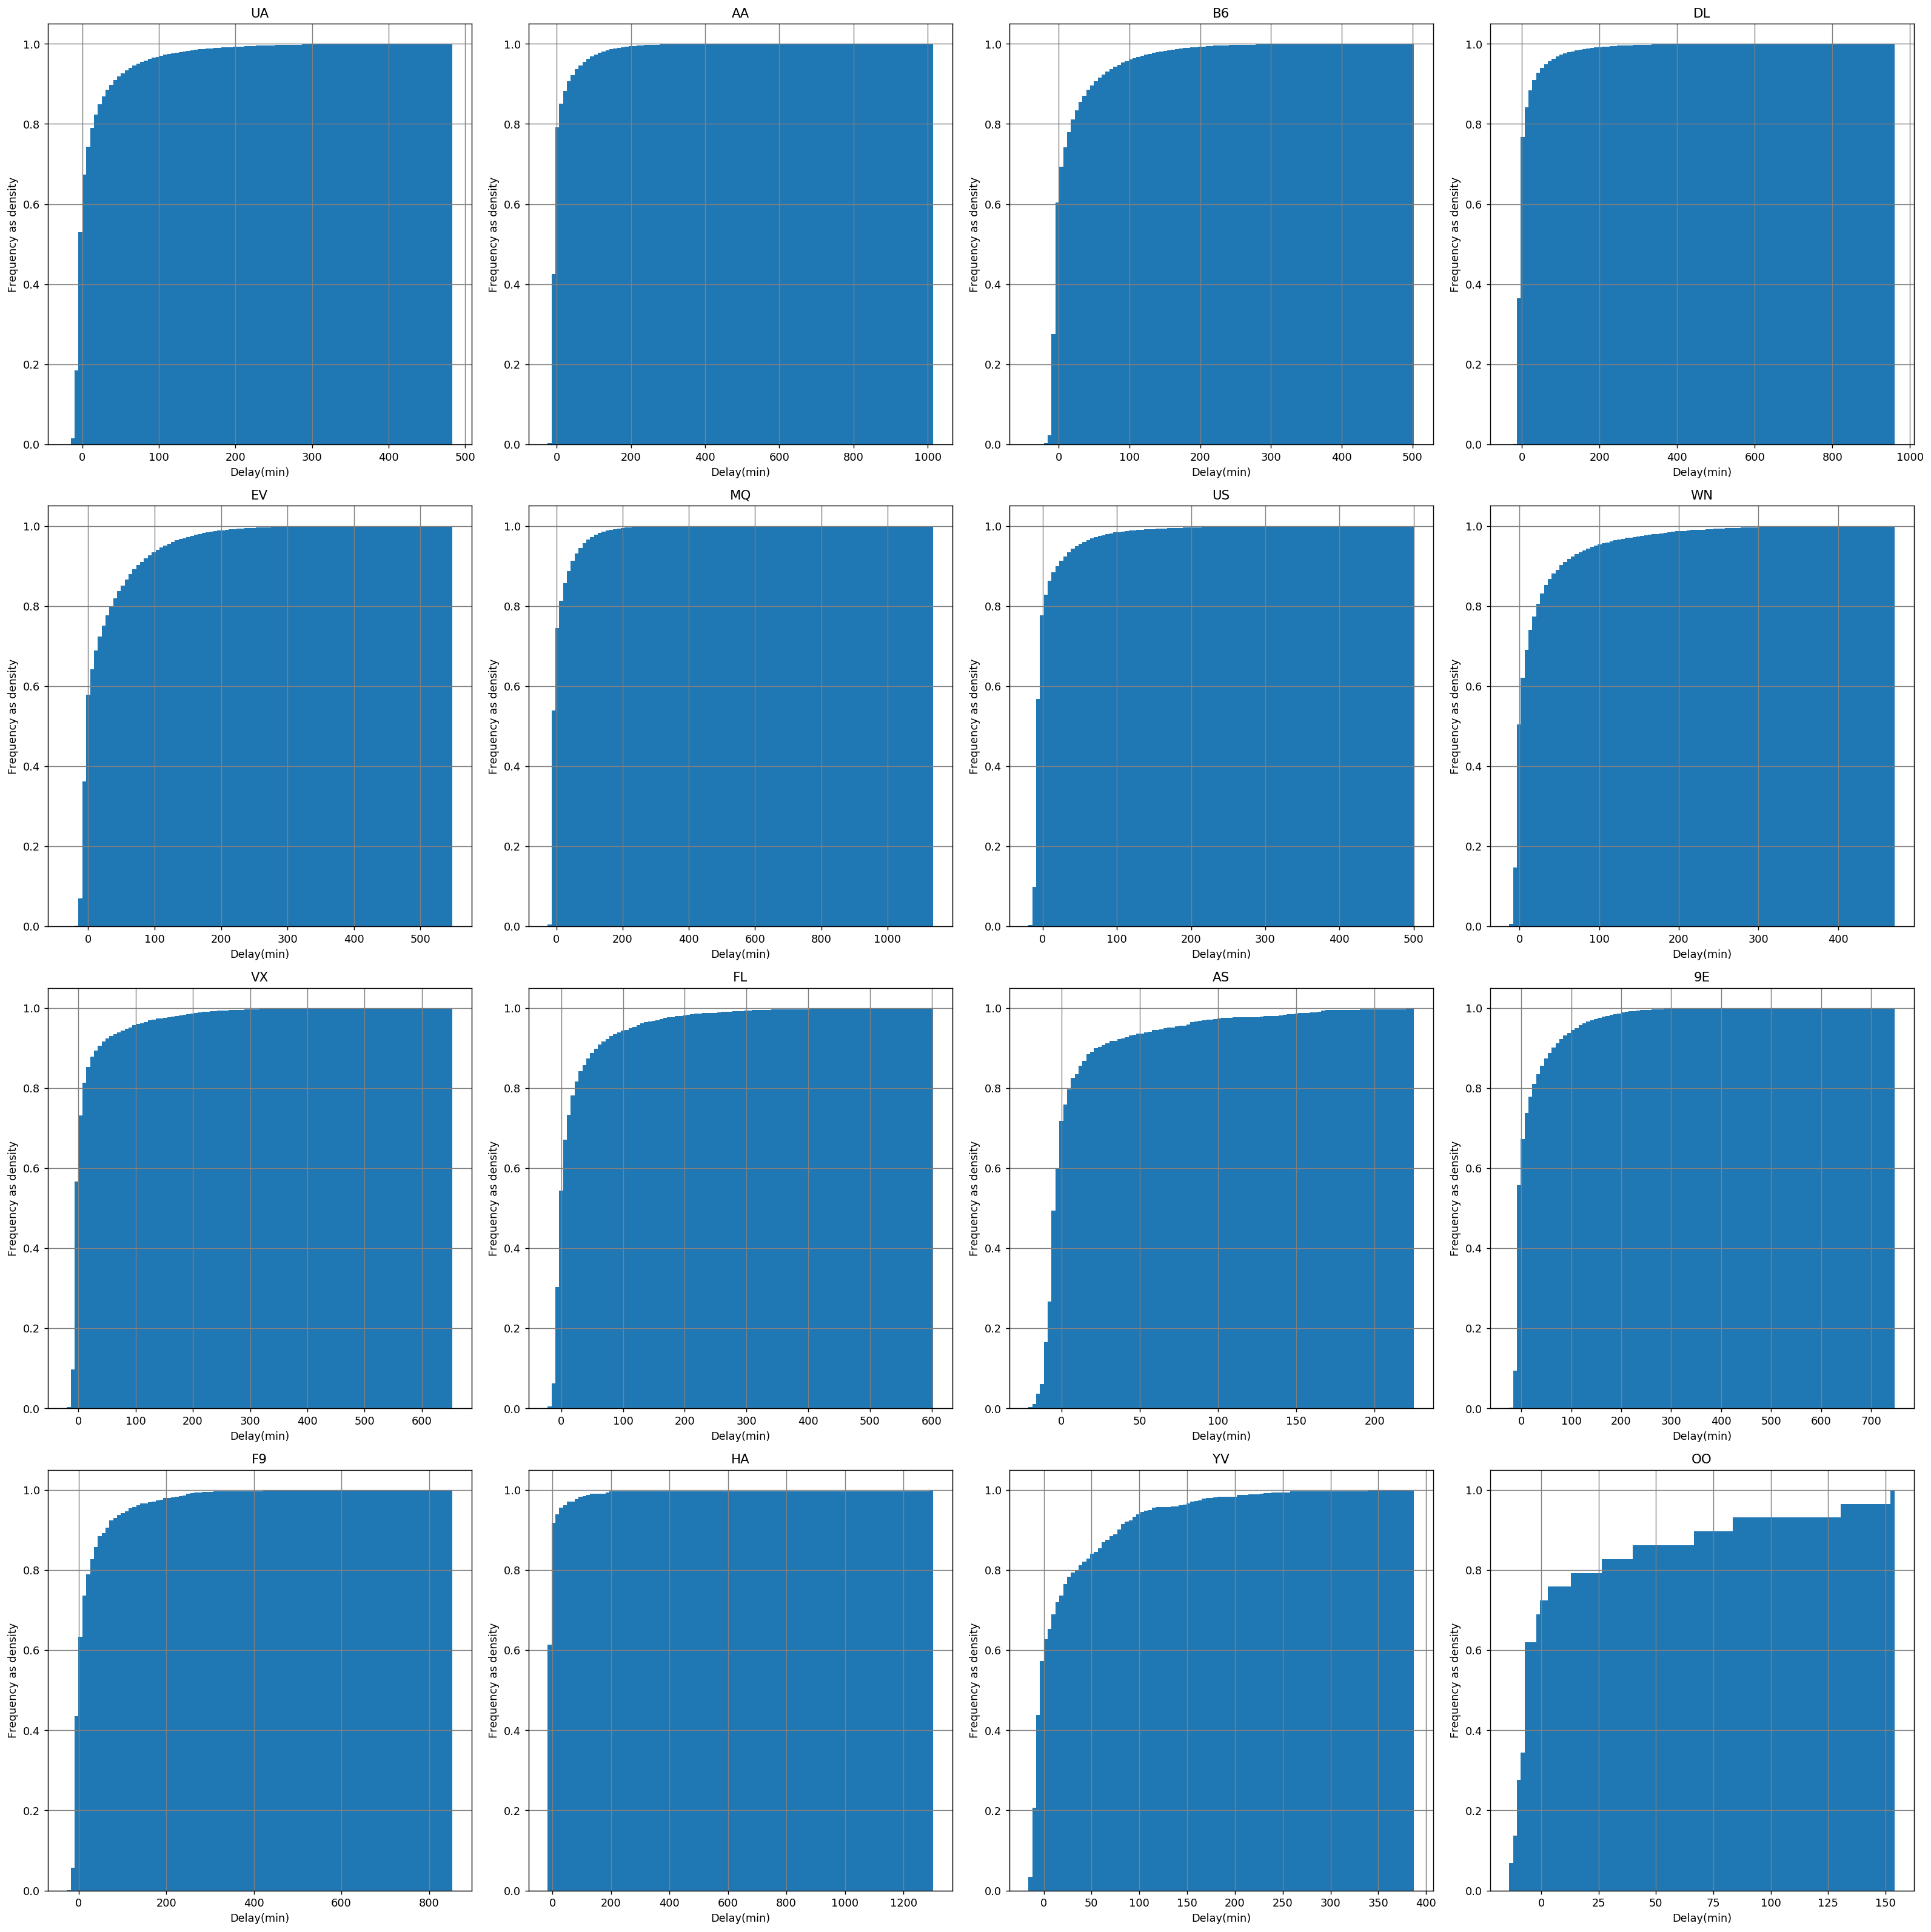

In [14]:
plt.figure(dpi = 128, figsize = (25,25))
for n, i in enumerate(carrierlist):
    plt.subplot(4,4,n+1)
    plt.hist(flight.dep_delay[flight.carrier == i], bins = 100, density = True, cumulative = True)
    plt.title(i)
    plt.xlabel("Delay(min)")
    plt.ylabel("Frequency as density")
    plt.grid(True, color = 'gray', linestyle = '-')

plt.tight_layout()
plt.show()       

HA is the best

Part B iii

In [15]:
flight.head(5)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


The inter arrival time should be the time gap between each arr_time for each airpot.
<br>
Let's first create a data frame slice that contains top5 busiest airport.
<br>
We can identify airport's volume by counting the number of flight's destination for each airport.

Let's first create a seperate data frame for top 5 airports only 

To avoid entering each airport's code manually for filtering and slicing dataframe, we can use pd.concat() function with a simple for-loop for searching and filtering by airport's code 

In [16]:
flight1 = pd.DataFrame(pd.concat([flight[flight.dest == i]
                                  for i in list(flight['dest'].value_counts().nlargest(5).index)], ignore_index = True))
flight1

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,6,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
1,10,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00
2,26,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00
3,39,2013,1,1,629.0,630,-1.0,824.0,810,14.0,AA,303,N3CYAA,LGA,ORD,140.0,733,6,30,2013-01-01 06:00:00
4,58,2013,1,1,656.0,700,-4.0,854.0,850,4.0,AA,305,N4WNAA,LGA,ORD,143.0,733,7,0,2013-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80257,336652,2013,9,30,1932.0,1935,-3.0,2221.0,2232,-11.0,DL,1485,N927DA,LGA,MCO,132.0,950,19,35,2013-09-30 19:00:00
80258,336657,2013,9,30,1936.0,1910,26.0,2204.0,2203,1.0,DL,2159,N905DL,JFK,MCO,126.0,944,19,10,2013-09-30 19:00:00
80259,336720,2013,9,30,2050.0,2100,-10.0,2312.0,2344,-32.0,B6,499,N606JB,LGA,MCO,122.0,950,21,0,2013-09-30 21:00:00
80260,336724,2013,9,30,2052.0,2059,-7.0,2315.0,2358,-43.0,UA,1416,N68453,EWR,MCO,123.0,937,20,59,2013-09-30 20:00:00


Let's check if the above code is returning a dataframe that contains top 5 airports only

In [17]:
check = flight1.dest.unique()
answer = flight['dest'].value_counts().nlargest(5).index
check == answer

array([ True,  True,  True,  True,  True])

The new data frame we created correctly contains all top 5 airports. Now let's calculate the inter arrival time.
<br>
Not 100% sure which method is asked. First: Time difference between each arrival. Second: Time difference between each unique arrival.
<br>
The new data frame we created is already grouped and since we append each sorted group of airports seperately.


There are a lot of NaN in the data which will affect the axis range of our histogram. Let's create a new copy of flight1 without NaN.

In [18]:
flight1 = flight1.dropna(subset = ['arr_time'])
flight1.isna()['arr_time'].unique()

array([False])

In [19]:
flight1[flight1.sched_arr_time <= 100][['sched_arr_time','time_hour','day']]

,sched_arr_time,time_hour,day
4289,28,2013-12-01 23:00:00,1
18777,2,2013-10-02 21:00:00,2
18827,2,2013-10-03 21:00:00,3
18875,2,2013-10-04 21:00:00,4
19105,2,2013-10-09 21:00:00,9
...,...,...,...
79312,30,2013-09-02 21:00:00,2
79349,30,2013-09-03 21:00:00,3
79415,48,2013-09-05 22:00:00,5
79645,48,2013-09-12 22:00:00,12


There is a problem. Some flights arrive at next day while all date datas in the data file are recorded for departure date.
<br>
We need to create an arrival date in order to plot properly.

Flights arrive at next day will have a dep_time greater than arr_time.
<br><br>
We know from the .describe() function that dep_time and arr_time are all int, therefore can be subtracted or added directly.
<br><br>
First let's create a new column called date. Then we fill up the date column by concating column year, month, and day.
<br>
Then, if the dep_time is greater than arr_time, we add one day for the date data.
<br>
Plus, if the arr_time is 2400.0, we also add one day for the date data.

In [20]:
import datetime

Converting the string into date will automatically format month and day into two digit format.

In [21]:
flight1['date'] = flight1['year'].astype(str) + '-' + flight1['month'].astype(str) + '-' + flight1['day'].astype(str)
flight1['date'] = flight1['date'].astype('datetime64[ns]')
flight1['date']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       2013-01-01
1       2013-01-01
2       2013-01-01
3       2013-01-01
4       2013-01-01
           ...    
80257   2013-09-30
80258   2013-09-30
80259   2013-09-30
80260   2013-09-30
80261   2013-09-30
Name: date, Length: 78545, dtype: datetime64[ns]

If dep_time > arr_time, plus one day for date.

In [22]:
for i in range(len(flight1)):
    if flight1.iloc[i,4] > flight1.iloc[i,7]:
        flight1.iloc[i,int(flight1.columns.get_loc('date'))] = flight1.iloc[i,int(flight1.columns.get_loc('date'))] + datetime.timedelta(days = 1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


If arr_time is 2400.0, also plus one day.

In [23]:
for i in range(len(flight1)):
    if flight1.iloc[i, 7] == 2400.0:
        flight1.iloc[i,int(flight1.columns.get_loc('date'))] = flight1.iloc[i,int(flight1.columns.get_loc('date'))] + datetime.timedelta(days = 1)

Hour and minutes data are harder to convert because some arr_time does not include hour at all.
<br>
First we need to create a new column arr_time1, then clean up the format.
<br>
Then we seperate the arr_time1 into hour and minute.
<br>

In [24]:
flight1['arr_time1'] = flight1['arr_time'].astype(int)
flight1.columns.get_loc('arr_time1')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


21

In [25]:
for i in range(len(flight1)):
    if flight1.iloc[i,21] < 10:
        flight1.iloc[i,21] = '000' + str(flight1.iloc[i,21])
    elif flight1.iloc[i,21] < 100:
        flight1.iloc[i,21] = '00' + str(flight1.iloc[i,21])
    elif flight1.iloc[i,21] < 1000:
        flight1.iloc[i,21] = '0' + str(flight1.iloc[i,21])
    else:
        continue

In [26]:
flight1['hour'] = flight1['arr_time1'].astype(str).str[0:2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
flight1.columns.get_loc('hour')

17

In [28]:
for i in range(len(flight1)):
    if flight1.iloc[i,17] == '24':
        flight1.iloc[i,17] = '00'

In [29]:
flight1['minute'] = flight1['arr_time1'].astype(str).str[2:4]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Create a complete date data with hour, minute, and second.

In [30]:
flight1['date2'] = flight1['date'].astype(str) + '-' + flight1['hour'].astype(str) + '-' + flight1['minute'].astype(str) + '-' + '00'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
flight1['date2'] = pd.to_datetime(flight1.date2, format = '%Y-%m-%d-%H-%M-%S')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Sort data by dates within each group of airport.

In [32]:
for i in list(flight1.dest.unique()):
    flight1[flight1.dest == i] = flight1[flight1.dest == i].sort_values('date2')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Calculate time difference.

In [33]:
flight1['inter'] = flight1['date2'].diff()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Plot

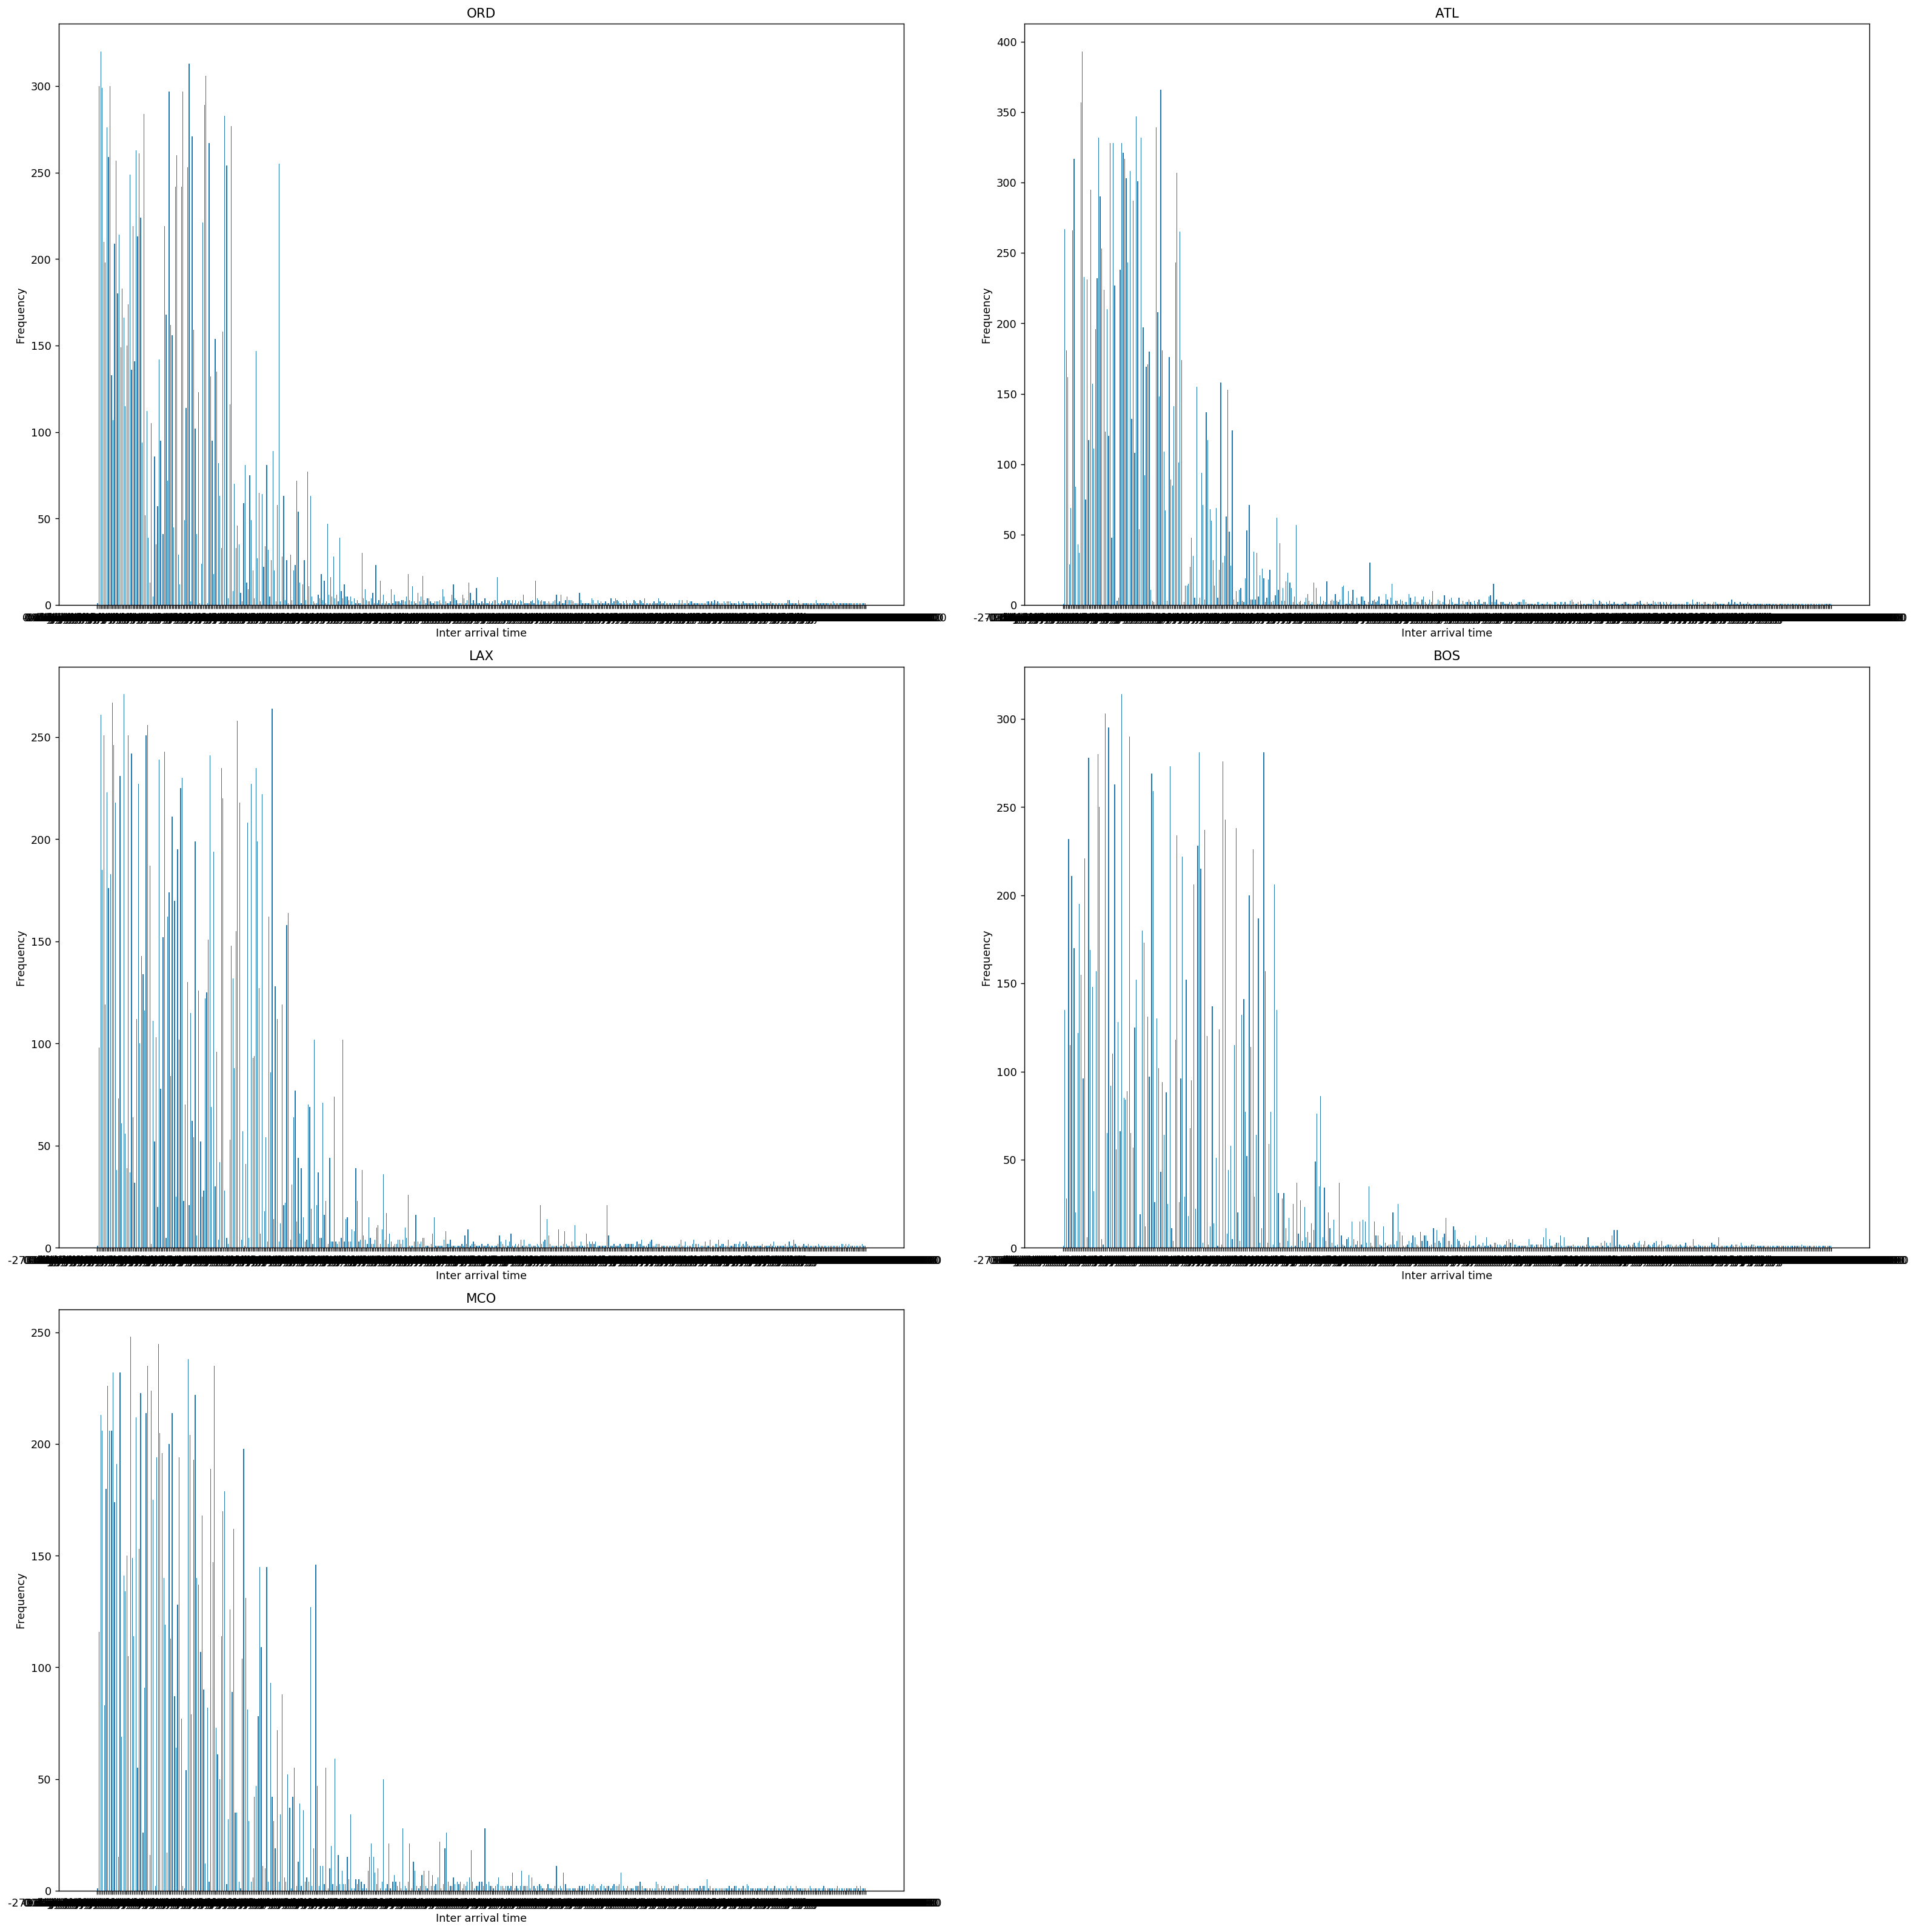

In [35]:
plt.figure(dpi = 128, figsize = (25,25))
carrierlist5 = list(flight1.dest.unique())
for n, i in enumerate(carrierlist5):
    plt.subplot(3,2,n+1)
    plt.hist(flight1[flight1.dest == i]['inter'].astype(str), bins = 1000)
    plt.title(i)
    plt.xlabel("Inter arrival time")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show() 